# Credit Card Customer Segmentation

##### Objective: In this project, we're the data analyst tasked with assigning each client to a group with an explanation of the characteristics of each group.

<b> Background: </b> We have received direction from the lead analyst to use a clustering algorithm to segment the customers. 

The data engineering team is helping provide the data for the project and was able to clean most of what will be used.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans # To use KMeans Clustering
from sklearn.preprocessing import StandardScaler # To standardize the data

In [2]:
customers = pd.read_csv('customer_segmentation.csv')
print(customers.shape)
print(customers.info())

(10127, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64

Looking at some of the information for the file, we can see:
 - There are 10,127 observations and 14 columns.
 - There are 3 categorical columns (Gender, Education Level, and Marital Status) and 11 numerical fields.
 - There appears to be no null values in any of the columns.

##### Exploratory Analsis

In [3]:
customers.corr()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
customer_id,1.000000,0.007613,0.006772,0.015787,0.134588,0.006907,0.005729,0.005708,-0.019692,-0.002961,0.000266
age,0.007613,1.000000,-0.122254,0.032922,0.788912,-0.010931,0.054361,0.002476,-0.046446,-0.067097,0.007114
dependent_count,0.006772,-0.122254,1.000000,0.051620,-0.103062,-0.039076,-0.010768,0.068065,0.025046,0.049912,-0.037135
estimated_income,0.015787,0.032922,0.051620,1.000000,0.027628,-0.007181,-0.002703,0.515863,0.015861,-0.039988,-0.277532
months_on_book,0.134588,0.788912,-0.103062,0.027628,1.000000,-0.009203,0.074164,0.007507,-0.038591,-0.049819,-0.007541
total_relationship_count,0.006907,-0.010931,-0.039076,-0.007181,-0.009203,1.000000,-0.003675,-0.071386,-0.347229,-0.241891,0.067663
months_inactive_12_mon,0.005729,0.054361,-0.010768,-0.002703,0.074164,-0.003675,1.000000,-0.020394,-0.036982,-0.042787,-0.007503
credit_limit,0.005708,0.002476,0.068065,0.515863,0.007507,-0.071386,-0.020394,1.000000,0.171730,0.075927,-0.482965
total_trans_amount,-0.019692,-0.046446,0.025046,0.015861,-0.038591,-0.347229,-0.036982,0.171730,1.000000,0.807192,-0.083034
total_trans_count,-0.002961,-0.067097,0.049912,-0.039988,-0.049819,-0.241891,-0.042787,0.075927,0.807192,1.000000,0.002838


/tmp/ipykernel_66/240100736.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  customers.drop(columns = 'customer_id').hist(ax = ax)


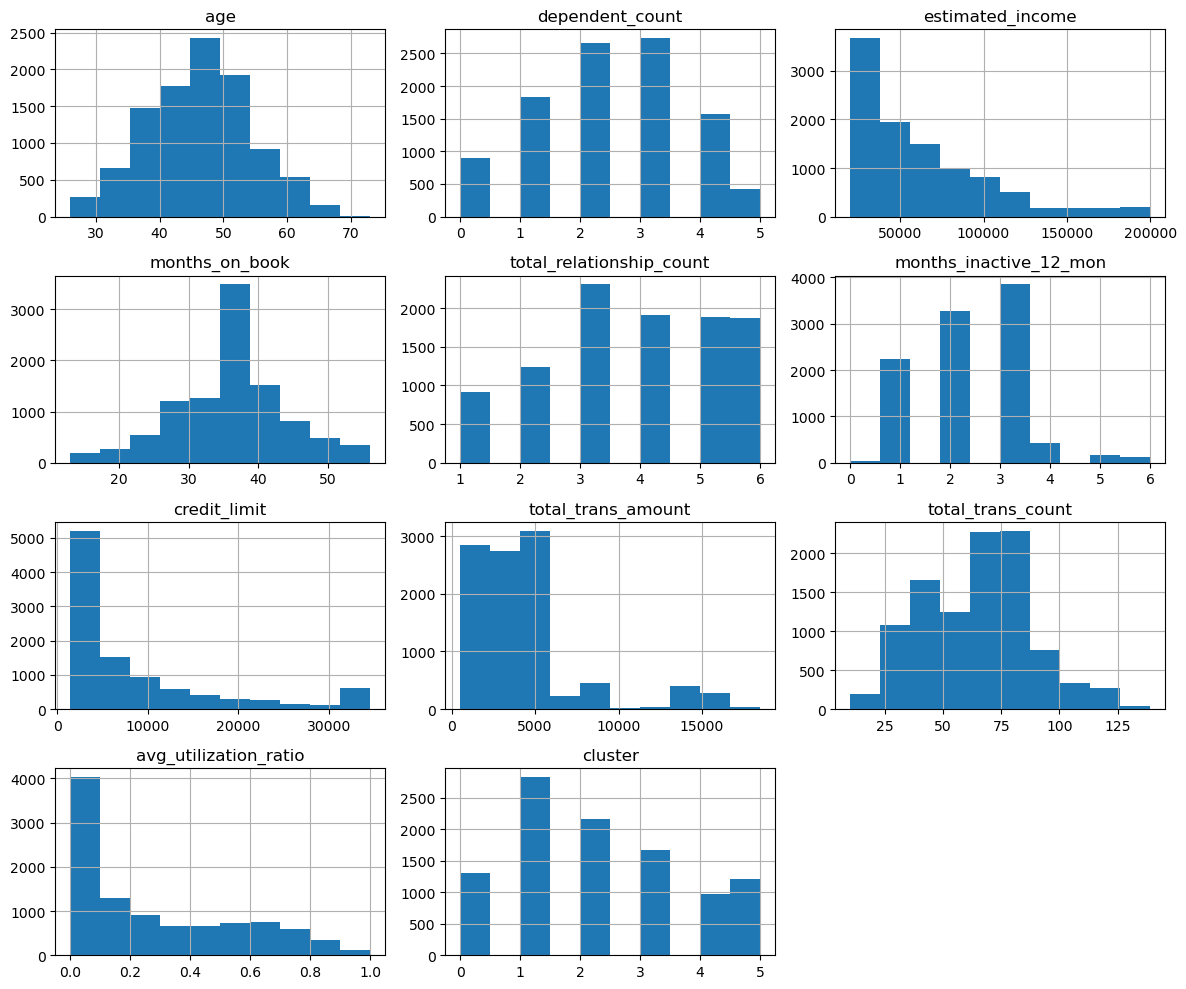

In [27]:
num_cols = ['age', 'dependent_count', 'estimated_income', 'months_on_book', 'total_relationship_count','months_inactive_12_mon','credit_limit',
           'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio']


fig, ax = plt.subplots(figsize = (12, 10))
customers.drop(columns = 'customer_id').hist(ax = ax)
plt.tight_layout()
plt.show()

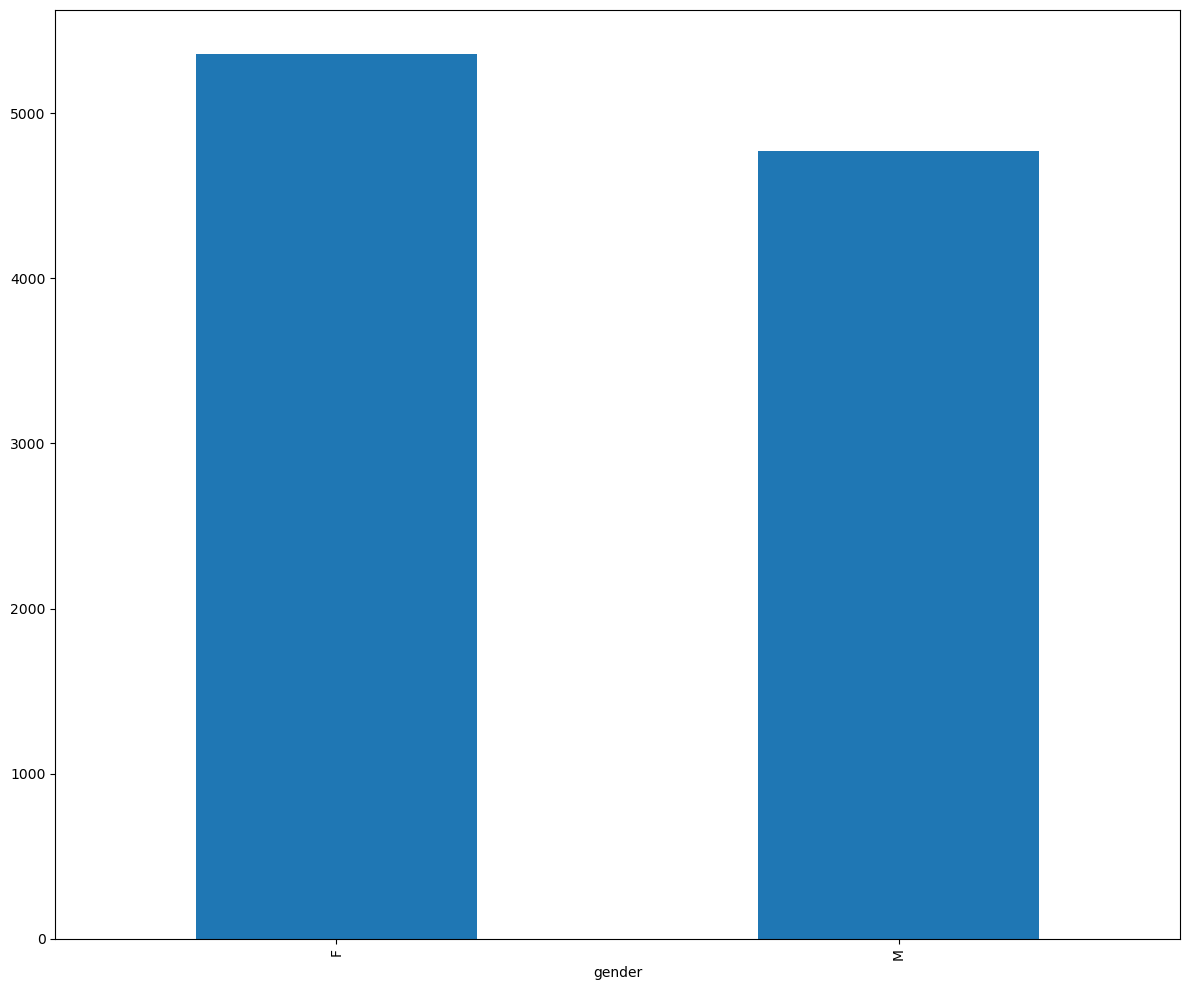

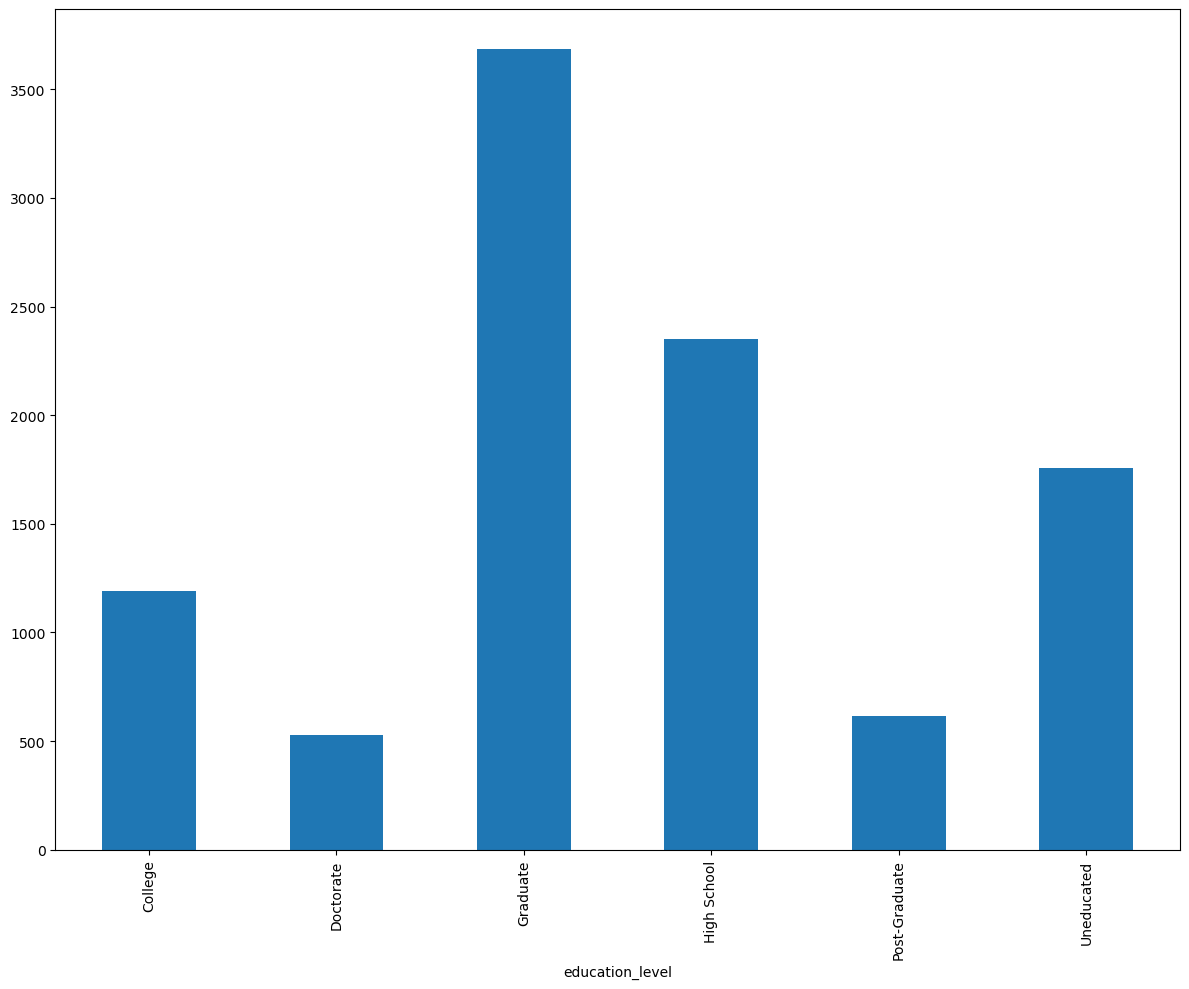

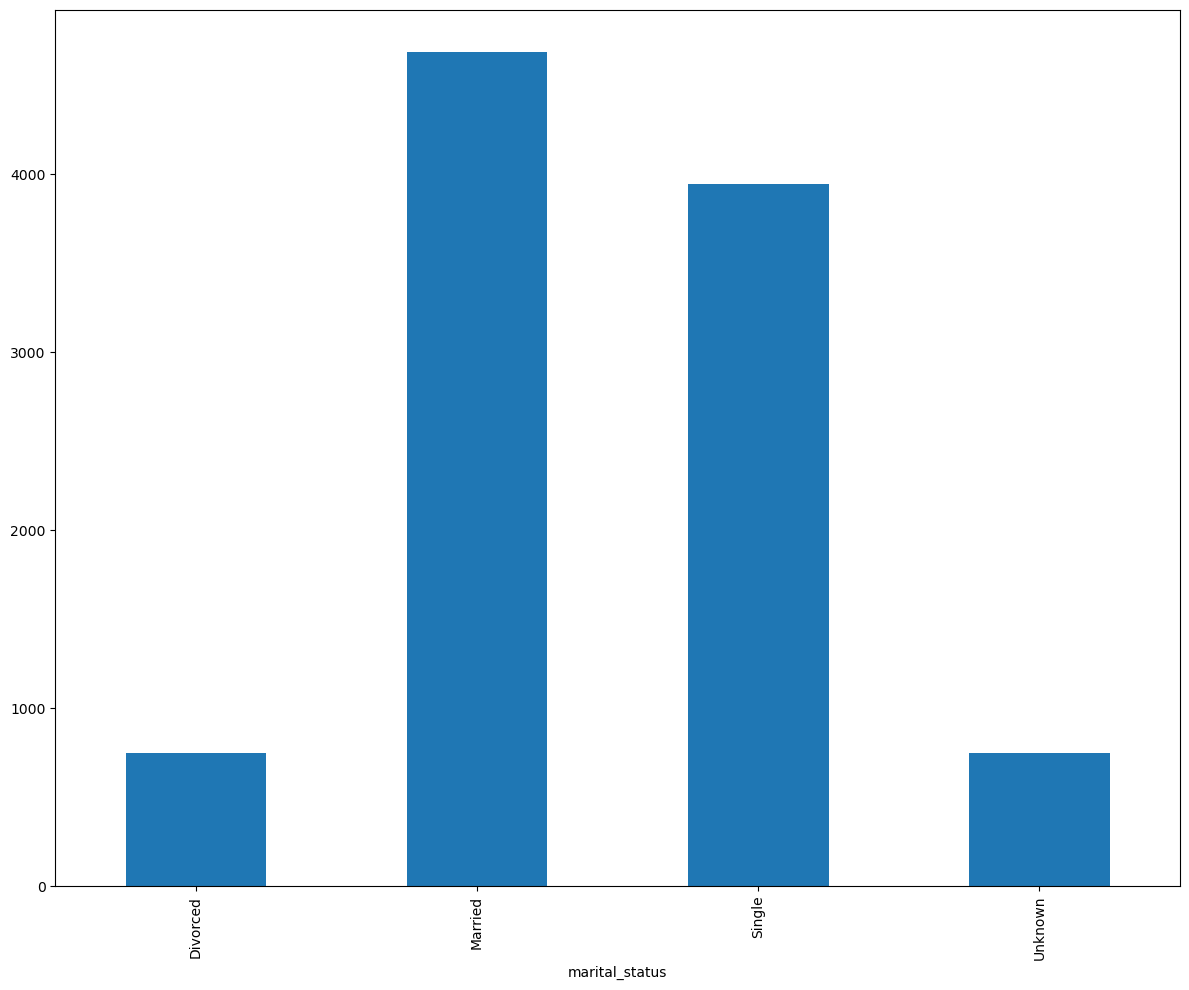

In [34]:
cat_cols = ['gender', 'education_level', 'marital_status']

for col in cat_cols:
    fig, ax = plt.subplots(figsize = (12, 10))
    customers.groupby(col).size().plot(kind = 'bar', ax = ax)
    plt.tight_layout()
    plt.show()

In [6]:
print((customers.groupby('gender').size() / customers.shape[0]) * 100)

print((customers.groupby('marital_status').size() / customers.shape[0]) * 100)

print((customers.groupby('education_level').size() / customers.shape[0]) * 100)

gender
F    52.908068
M    47.091932
dtype: float64
marital_status
Divorced     7.386195
Married     46.282216
Single      38.935519
Unknown      7.396070
dtype: float64
education_level
College          11.770514
Doctorate         5.213785
Graduate         36.387874
High School      23.215167
Post-Graduate     6.082749
Uneducated       17.329910
dtype: float64


Looking at the categorical columns, we can see:
 - <b> Gender: </b> Over half of the dataset is females.
 - <b> Marital Status: </b> Just under half of the dataset is married followed by 38% being single.
 - <b> Education Level: </b> The largest education level is graduate degrees while the smallest is doctorate degrees.

##### Feature Engineering

In [7]:
# First, we create a copy of the data.

customers_copy = customers.copy()

In [8]:
# Next we need to replace all categorical values with numbers.
# For gender, we just chose binary replacement.
customers_copy['gender'] = customers_copy['gender'].replace({'M' : 1, 'F' : 0})
customers_copy['gender'].head()

0    1
1    0
2    1
3    0
4    1
Name: gender, dtype: int64

In [9]:
# Because Education Level has some form of hierarchy, we can easily translate them to
# numerical values.
customers_copy['education_level'] = customers_copy['education_level'].replace(
    {'Uneducated' : 0,
     'High School' : 1,
     'College' : 2,
     'Graduate' : 3,
     'Post-Graduate' : 4,
     'Doctorate' : 5})

customers_copy['education_level'].head()

0    1
1    3
2    3
3    1
4    0
Name: education_level, dtype: int64

In [10]:
# Since there is no order level for marital status (i.e - one is better/higher than the others)
# We'll implement dummy variables

dummy_df = pd.get_dummies(data = customers_copy, columns = ['marital_status'])
customers_copy = pd.concat([customers_copy, dummy_df], axis = 1)
customers_copy = customers_copy.drop(columns = 'marital_status')

customers_copy.head()

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,...,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,...,5,1,12691.0,1144,42,0.061,0,1,0,0
1,818770008,49,0,5,3,24000,44,6,1,8256.0,...,6,1,8256.0,1291,33,0.105,0,0,1,0
2,713982108,51,1,3,3,93000,36,4,1,3418.0,...,4,1,3418.0,1887,20,0.000,0,1,0,0
3,769911858,40,0,4,1,37000,34,3,4,3313.0,...,3,4,3313.0,1171,20,0.760,0,0,0,1
4,709106358,40,1,3,0,65000,21,5,1,4716.0,...,5,1,4716.0,816,28,0.000,0,1,0,0


##### Scaling the data

We have a variety of data on different distrubtions like income vs. months_on_book vs. credit_limit.

We need to tranform the data so it's all on the same scale.

In [11]:
# Dropping the customer_id since it's not needed anymore.
customers_copy_no_id = customers_copy.copy().drop(columns = 'customer_id')

In [12]:
# Scaling the data
scaler = StandardScaler()

customers_copy_no_id_scaled = scaler.fit_transform(customers_copy_no_id)

# Since the scaler produces an array, we need to transform it back to a dataframe.
# We can also use the column names from the no_id dataframe.
customers_copy_no_id_scaled = pd.DataFrame(customers_copy_no_id_scaled,
                                           columns = customers_copy_no_id.columns)

customers_copy_no_id_scaled.head()

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,...,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,...,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,-0.282405,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,...,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.282405,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,...,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,-0.282405,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,...,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.282405,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,...,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,-0.282405,1.077338,-0.798507,-0.282609


##### Building our Clustering Model

First, we need to determine the best number of clusters to use in our segmentation.

We can determine this by creating multiple models and compute the inertia value for each of them. We can then use an 'Elbow Curve' to decide the number of clusters.

In [13]:
inertias = []
max_clusters = 10

for num in range(1, max_clusters):
    model = KMeans(n_clusters = num + 1)
    model.fit_predict(customers_copy_no_id_scaled)
    inertias.append(model.inertia_)

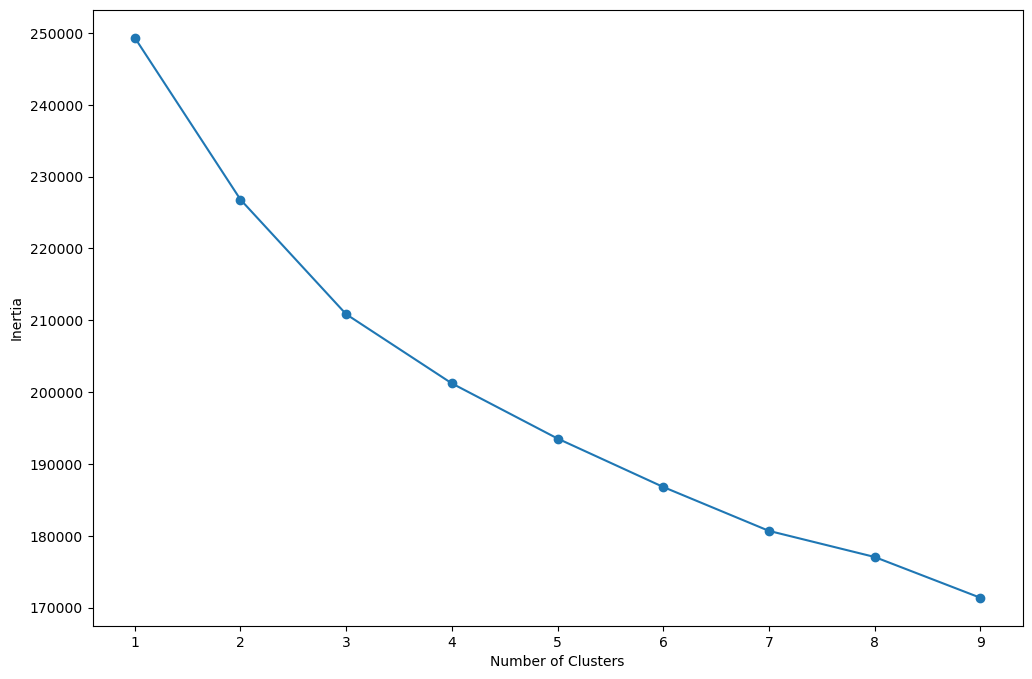

In [14]:
plt.figure(figsize = (12,8))
plt.plot(range(1, len(inertias) + 1), inertias, marker = 'o')
plt.xticks(range(1, len(inertias) + 1))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

Looking at the "Elbow Curve" above, we're going to suggest using between 6-8 clusters. We'll start with 6 clusters and see how that looks.

In [15]:
# Building model with 6 clusters from elbow curve

model = KMeans(n_clusters = 6)
clusters = model.fit_predict(customers_copy_no_id_scaled)

print(clusters)

[2 1 2 ... 1 2 0]


In [16]:
# Adding the cluser variable to the original dataframe

customers['cluster'] = clusters

customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,cluster
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,2
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,1
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,2
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,1
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,2


In [17]:
# Plotting clusters by variables.

customers.groupby('cluster')['estimated_income'].agg('mean')

cluster
0     46315.627406
1     36488.149982
2     85414.351852
3     45426.170468
4     66930.998970
5    116432.724252
Name: estimated_income, dtype: float64

In [18]:
means = customers.groupby('cluster')[num_cols].agg('mean')
print(means)

               age  dependent_count  estimated_income  months_on_book  \
cluster                                                                 
0        35.075443         1.411855      46315.627406       25.367206   
1        45.760170         3.101521      36488.149982       35.448532   
2        46.034259         2.799074      85414.351852       35.862963   
3        56.668067         1.087635      45426.170468       45.177671   
4        45.331617         2.313079      66930.998970       35.105046   
5        46.807309         2.536545     116432.724252       36.432724   

         total_relationship_count  months_inactive_12_mon  credit_limit  \
cluster                                                                   
0                        4.250962                2.163972   4868.027175   
1                        3.807216                2.381323   4145.351468   
2                        4.100463                2.349537   7145.288380   
3                        4.038415       

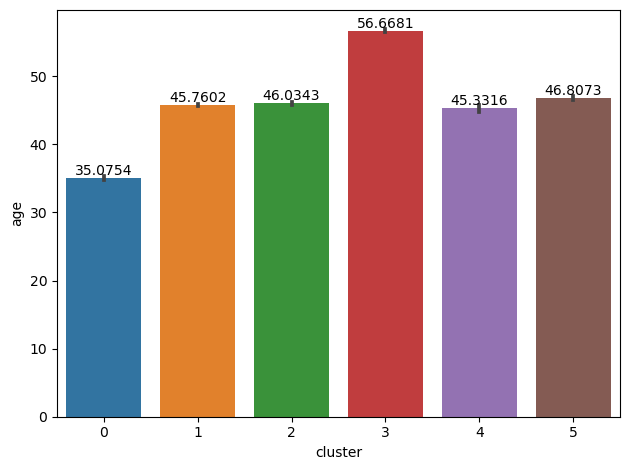

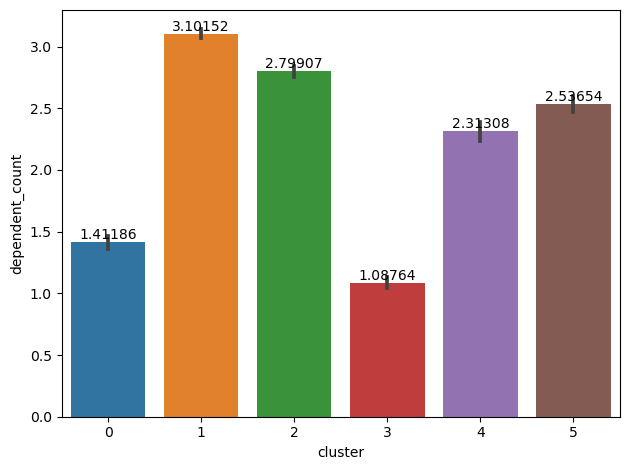

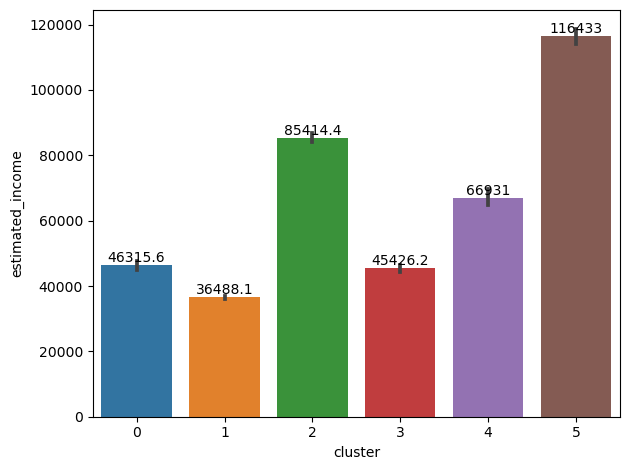

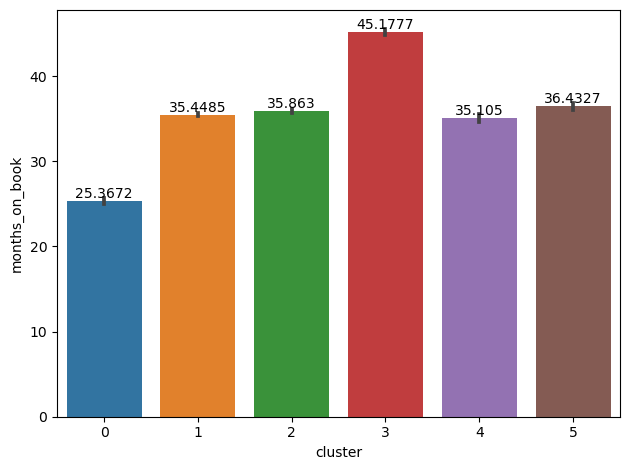

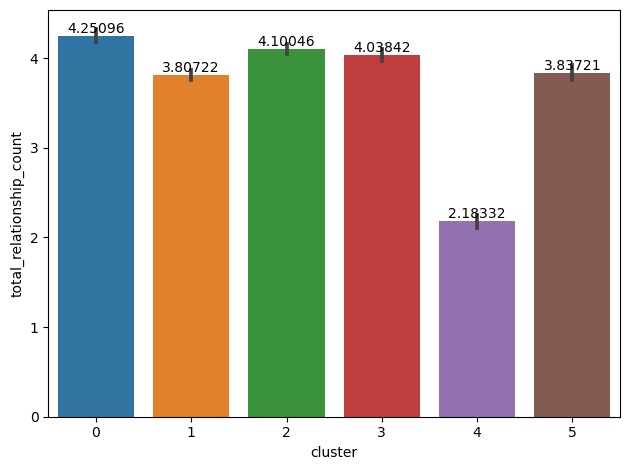

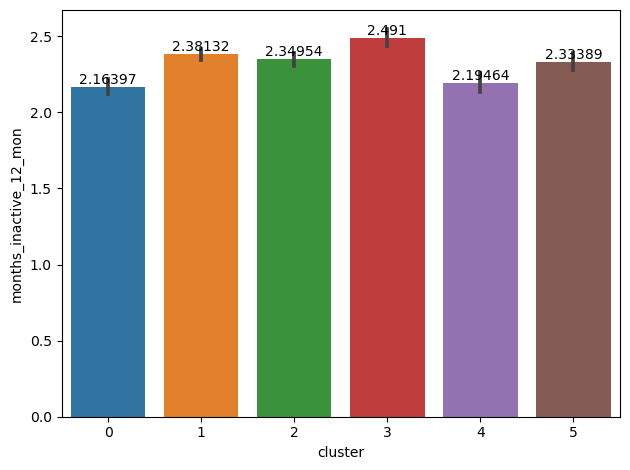

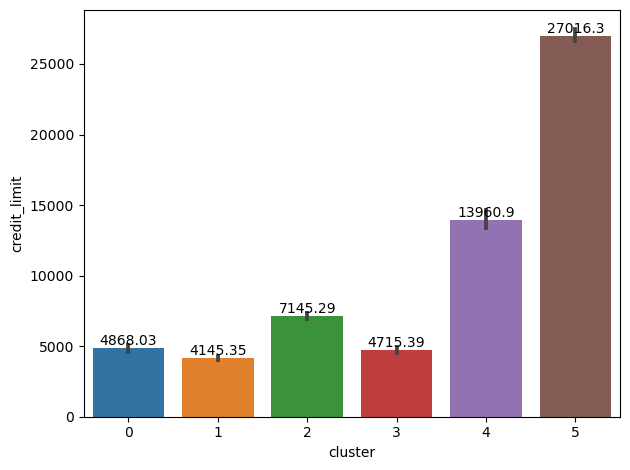

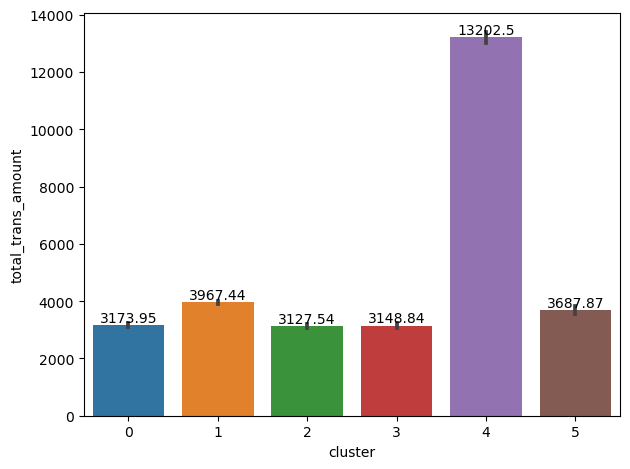

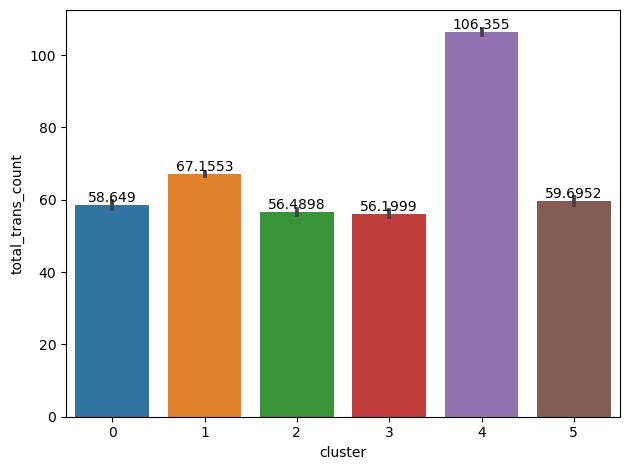

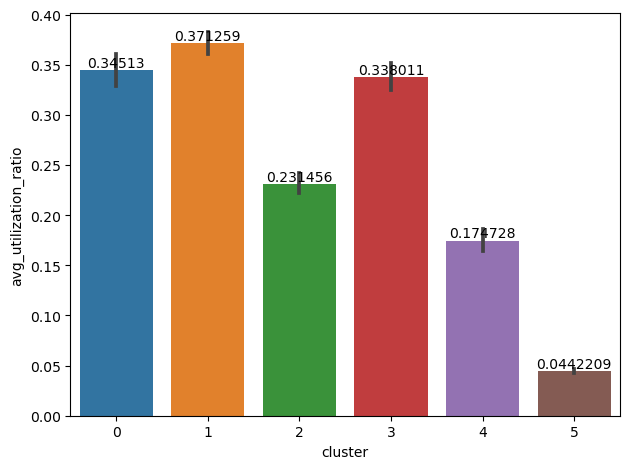

In [22]:
for col in num_cols:
    ax = sns.barplot(data = customers, x = 'cluster', y = col)
    ax.bar_label(ax.containers[0])
    plt.tight_layout()
    plt.show()

<b>Examining Clusters by Numerical Variables: </b>
 - <b>Age</b>: Cluster 0 has the lowest average age of 35 while Cluster 3 has the highest average age of 56.
 - <b>Dependents</b>: Cluster 1 has the highest average amount of dependents while Cluster 3 has the lowest amount (this could be due their kids being grown and moved out since the avg age of the cluster is 56.)
 - <b>Estimated Income</b>: Clusters 2 & 5 have the highest estimated income
 - <b>Total Relationship Count</b>: Cluster 4 seems to contact the company the least (we can assume that they don't have as many grievances.)
 - <b>Credit Limit</b>: Clusters 4 & 5 have the highest credit limit
 - <b>Total Trans Amount/Count</b>: Cluster 4 has by far the largest transaction amounts on average and transaction counts.
 - <b>Utilization Ratio</b>: Cluster 5 has the lowest utilization ratio while clusters 0,1, and 3 all have similar utilization ratios on the high end.

In [20]:
# Looking at the categorical columns

# We can loop through the columns and put them all in one table.
table = []

for col in cat_cols:
    ct = pd.crosstab(customers['cluster'], customers[col], normalize = 'index')
    table.append(ct)
    

print(table)

[gender          F         M
cluster                    
0        0.651270  0.348730
1        0.992572  0.007428
2        0.020370  0.979630
3        0.734094  0.265906
4        0.376931  0.623069
5        0.060631  0.939369, education_level   College  Doctorate  Graduate  High School  Post-Graduate  \
cluster                                                                      
0                0.123172   0.043110  0.374134     0.234796       0.071594   
1                0.120269   0.051645  0.363283     0.224266       0.058012   
2                0.116204   0.050000  0.367593     0.238426       0.066204   
3                0.112845   0.070228  0.371549     0.222689       0.055822   
4                0.112255   0.045314  0.358393     0.237899       0.054583   
5                0.119601   0.047342  0.341362     0.245017       0.058140   

education_level  Uneducated  
cluster                      
0                  0.153195  
1                  0.182526  
2                  0.161574  

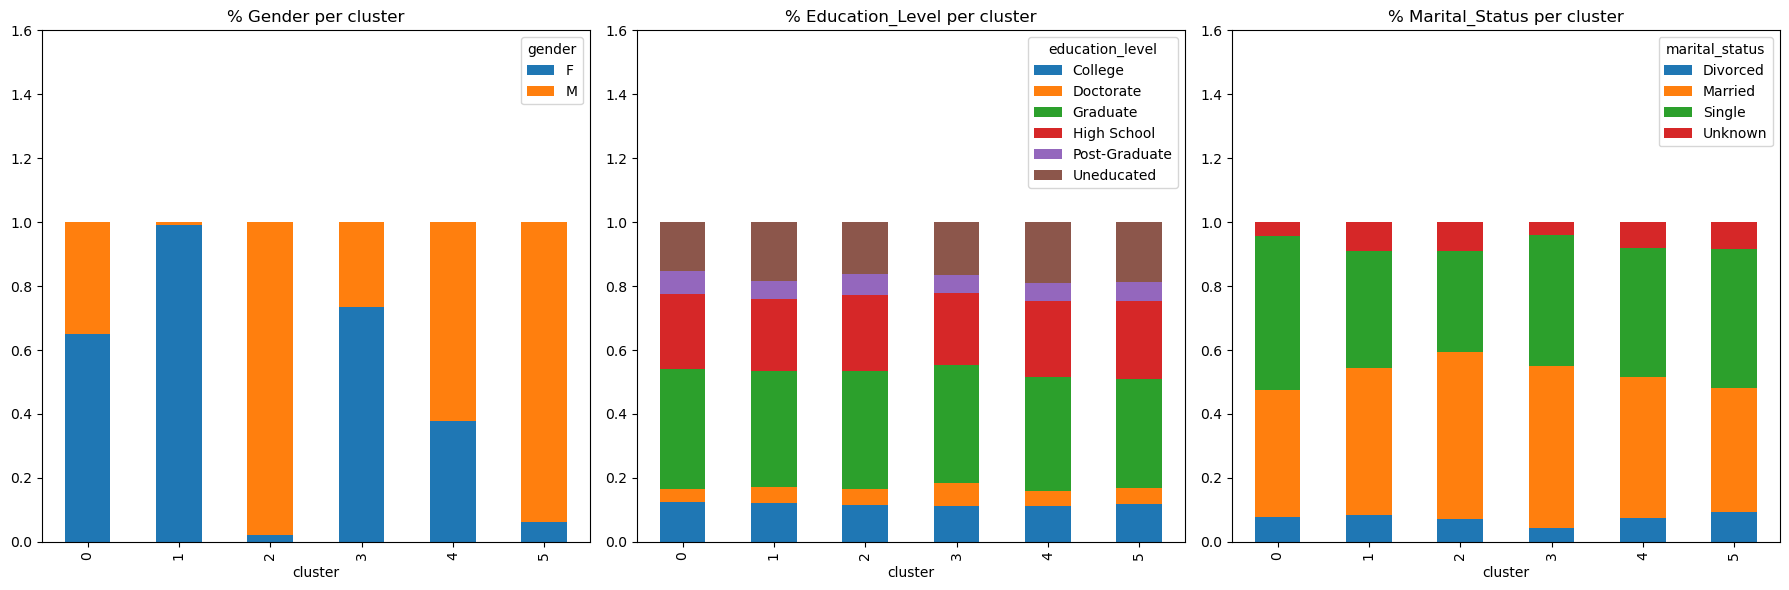

In [44]:
fig = plt.figure(figsize = (18, 6))

for i, col in enumerate(cat_cols):
    table = pd.crosstab(index = customers['cluster'], columns = customers[col], values = customers[col], normalize = 'index', aggfunc = 'size')
    ax = fig.add_subplot(1, 3, i + 1)
    table.plot.bar(stacked = True, ax = ax)
    ax.set_title(f'% {col.title()} per cluster')
    ax.set_ylim(0, 1.6) # This makes the legend appear in the top right corner

plt.tight_layout()
plt.show()

<b>Clusters by Categorical variables: </b> We notice that our clusters are pretty evenly distributed across education level and marital status, BUT our clusters widely vary in terms of gender.

#### Conclusions

The ultimate ask of this analysis was to assign each customer to a group (cluster) with an explanation of each cluster. Below is our analysis of each cluster.

##### <b>Cluster 0</b>

<b>Characteristics: </b>Is pretty proportional in gender, but slightly more female customers. Almost half of the customers have a graduate level education and are either married or single. They have low transaction amount and low limits. Typically about 35 years of age and have been on the books the lowest on average. This cluster has a higher contact amount on average - could be driven by problems or disputes (would need to research further with new data).

<b>Opportunity: </b> Create an incentive plan that rewards higher utilization - either with credit limit increases or point rewards to retain. To reduce customer contact, potentially implement a few other questions to identify concerns/problems on first calls with customer.

##### <b>Cluster 1</b>

<b>Characteristics: </b> Almost entirely female customers. Mostly graduate education and majority married. Has the second highest transaction count and amounts on average.This group has the lowest credit amount and the lowest income on average. Has a high dependent count and average age is 45 (we can assume that these are mothers) and have been on the books about 3 years.

<b>Opportunity: </b> We can market a promotion for higher rewards for back to school season or major school holidays.

##### <b>Cluster 2</b>

<b>Characteristics: </b>

<b>Opportunity: </b> 

##### <b>Cluster 3</b>

<b>Characteristics: </b>

<b>Opportunity: </b> 

##### <b>Cluster 4</b>

<b>Characteristics: </b>

<b>Opportunity: </b> 

##### <b>Cluster 5</b>

<b>Characteristics: </b>

<b>Opportunity: </b> 